#### This notebook is a submission for a Data Science Internship Role at Stirring Minds.
#### Notebook Author - Sajal Chandra
#### Notebook Author Contact - sajalchandra1123@gmail.com

Dataset taken from - https://www.kaggle.com/loveall/clicks-conversion-tracking 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dataset.csv')
exp = ['Impressions', 'Spent', 'Clicks','Total_Conversion','Approved_Conversion']

First, it is important to perform some feature engineering on the dataset in order to make it suitable for analysis. I am going to do the following operations on the data:

1. Create a new column named 'age_years' that is a numeric form of the 'age' column. The values are the mean of the corresponding range given in the 'age' column. This will be useful in statistical analysis later on.

2. Create a 'gender_dum' column that encodes the 'gender' column in numeric form.

3. Create some new columns that give us a better idea about the performance of a particular advertisement. They are as follows:

    - Reach to Conversion Ratio: Number of impressions/Total Conversions. This tells us the number of Impressions that had to be shown before a conversion was achieved.

    - Click to Conversion Ratio: Number of Clicks/Total Conversions. The number of ad clicks for each conversion.
    - Impressions per Click: Number of Impressions/Number of Clicks. The number of impressions needed to generate a click. Also known as 'Click Through Rate'.
4. Finally, I created three columns that give us an idea of the value associated with each advertisement. For this, I have made a couple of assumptions- first, each successful sale(Approved Conversion) is assigned a value of 100. Secondly, each conversion that wasn't approved(Total Conversions - Approved Conversions) is assigned a value of 5. <br> Using these assumptions, I have created the following columns:
    - Total Conversion Value: Value of Approved+Rejected Conversions. This gives an idea of the total value generated by an ad.
    - Cost per Click: Spend/Clicks. Money spent to generate one click.
    - ROAS(Return on Advertising Spend): Total Conversion Value/Spent. This column quantizes the ROI on an advertisement.
    
**NOTE** <br>
Reach to Conversion Ratio and Click to Conversion Ratio are both _negatively_ correlated with the value of an advertisement. Please keep this in mind. Lower they are, better is the performance!

In [7]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [8]:
df1 = pd.read_csv('dataset.csv')


## Feature Engineering

In [9]:
df['Reach_to_Conversion_Ratio'] = df['Impressions']/df['Total_Conversion']
df['Click_to_Conversion_Ratio'] = df['Clicks']/df['Total_Conversion']

df['Impressions_per_Click'] = df['Impressions']/df['Clicks']

age_dict = {'30-34':32, '35-39':37, '40-44':42, '45-49':47}

df['age_years'] = df['age'].map(age_dict)

df['gender_dum'] = df['gender'].map({'M':0, 'F':1})

df['Total_Conversion_Value'] = (df['Total_Conversion']-df['Approved_Conversion'])*5 + df['Approved_Conversion']*100
df['Cost_per_Click'] = df['Spent']/df['Clicks']
df['ROAS'] = df['Total_Conversion_Value'] / df['Spent']

In [12]:
temp = []
for col in df.columns:
    if col not in df1.columns:
        temp.append(col)
df[temp].head()

,Reach_to_Conversion_Ratio,Click_to_Conversion_Ratio,Impressions_per_Click,age_years,gender_dum,Total_Conversion_Value,Cost_per_Click,ROAS
0,3675.0,0.5,7350.0,32,0,105,1.43,73.426576
1,8930.5,1.0,8930.5,32,0,10,0.91,5.494505
2,693.0,0.0,inf,32,0,5,NaN,inf
3,4259.0,1.0,4259.0,32,0,5,1.25,4.000000
4,4133.0,1.0,4133.0,32,0,100,1.29,77.519382


## Preliminary Analysis

Let's take a look at the effectiveness(Reach to Conversion Ratio and Click to Conversion Ratio) and the gnerated value(Total Conversion Value and ROAS) plotted by various categories.

(0, 80)

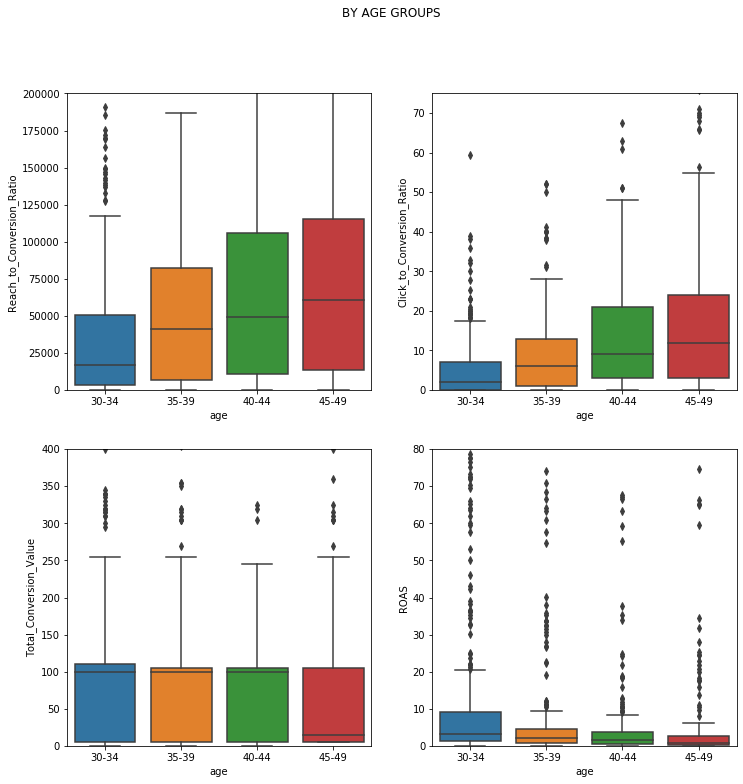

In [4]:
f, ax = plt.subplots(2,2, figsize=(12,12))
plt.suptitle('BY AGE GROUPS')

a1 = sns.boxplot(x='age', y='Reach_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][0], )
a1.set_ylim((0,200000))

ax2 = sns.boxplot(x='age', y='Click_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][1])
ax2.set_ylim((0,75))

ax3 = sns.boxplot(x='age', y='Total_Conversion_Value', data=df, orient='v', ax=ax[1][0])
ax3.set_ylim((0,400))

ax4 = sns.boxplot(x='age', y='ROAS', data=df[df['ROAS']!=np.inf], ax=ax[1][1], orient='v')
ax4.set_ylim(0,80)

**Initial thoughts** - The 30-34 age group stands out as the best performing in these plots, it has the highest effectiveness as well as the best value and ROI. The means of the 35-39 and the 40-44 age groups seem very similar, whereas the 45-49 age group is neither high value nor effective.

(0, 180)

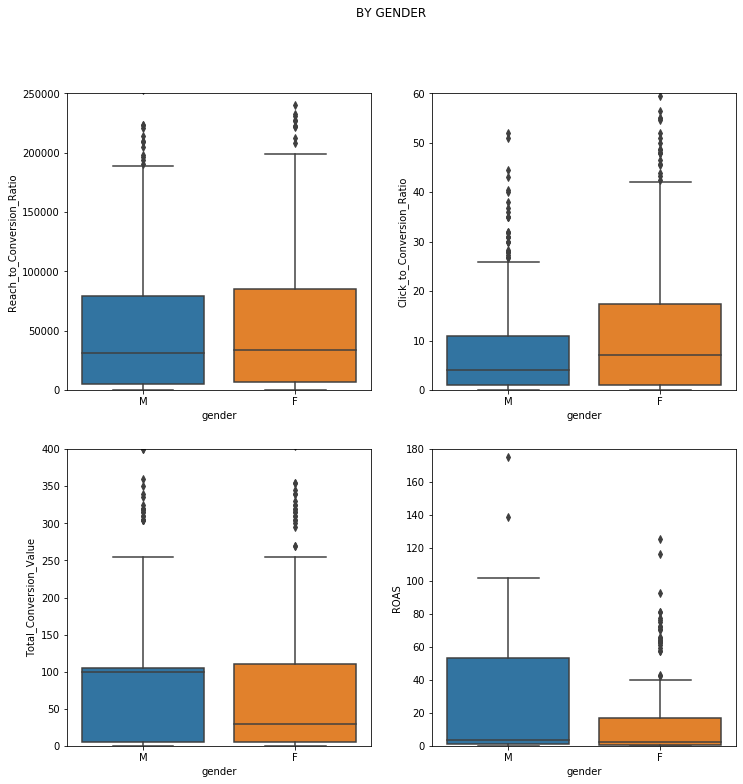

In [5]:
f, ax = plt.subplots(2,2, figsize=(12,12))
plt.suptitle('BY GENDER')

a1 = sns.boxplot(x='gender', y='Reach_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][0], )
a1.set_ylim((0,250000))

ax2 = sns.boxplot(x='gender', y='Click_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][1])
ax2.set_ylim((0,60))

ax3 = sns.boxplot(x='gender', y='Total_Conversion_Value', data=df, orient='v', ax=ax[1][0])
ax3.set_ylim((0,400))

ax4 = sns.boxplot(x='gender', y='ROAS', data=df, ax=ax[1][1], orient='v')
ax4.set_ylim(0,180)

On initial viewing, it looks like the Males are a better target than Females. Let's combine the two metrics- age group and gender- to get a better idea about them.

(0, 80)

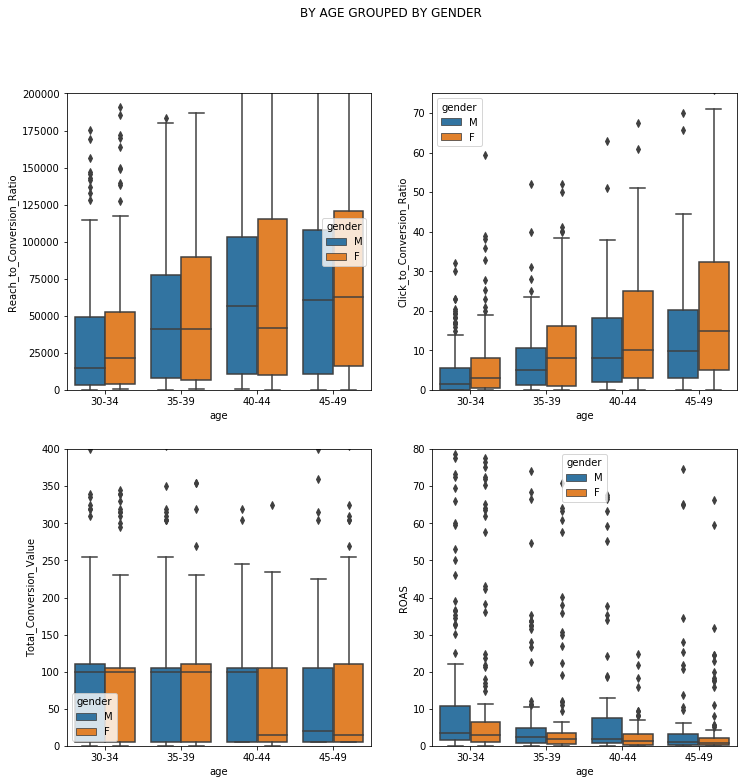

In [6]:
f, ax = plt.subplots(2,2, figsize=(12,12))

plt.suptitle('BY AGE GROUPED BY GENDER')

a1 = sns.boxplot(x='age', y='Reach_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][0], hue='gender')
a1.set_ylim((0,200000))

ax2 = sns.boxplot(x='age', y='Click_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][1], hue='gender')
ax2.set_ylim((0,75))

ax3 = sns.boxplot(x='age', y='Total_Conversion_Value', data=df, orient='v', ax=ax[1][0], hue='gender')
ax3.set_ylim((0,400))

ax4 = sns.boxplot(x='age', y='ROAS', data=df[df['ROAS']!=np.inf], ax=ax[1][1], orient='v', hue='gender')
ax4.set_ylim(0,80)

As expected, getting a conversion out of Males aged 30-34 is the easiest, as illustrated by the plots in the first row. In general, it seems that the younger age groups perform better, and the Males are usually a better target than the Females.

(0, 80)

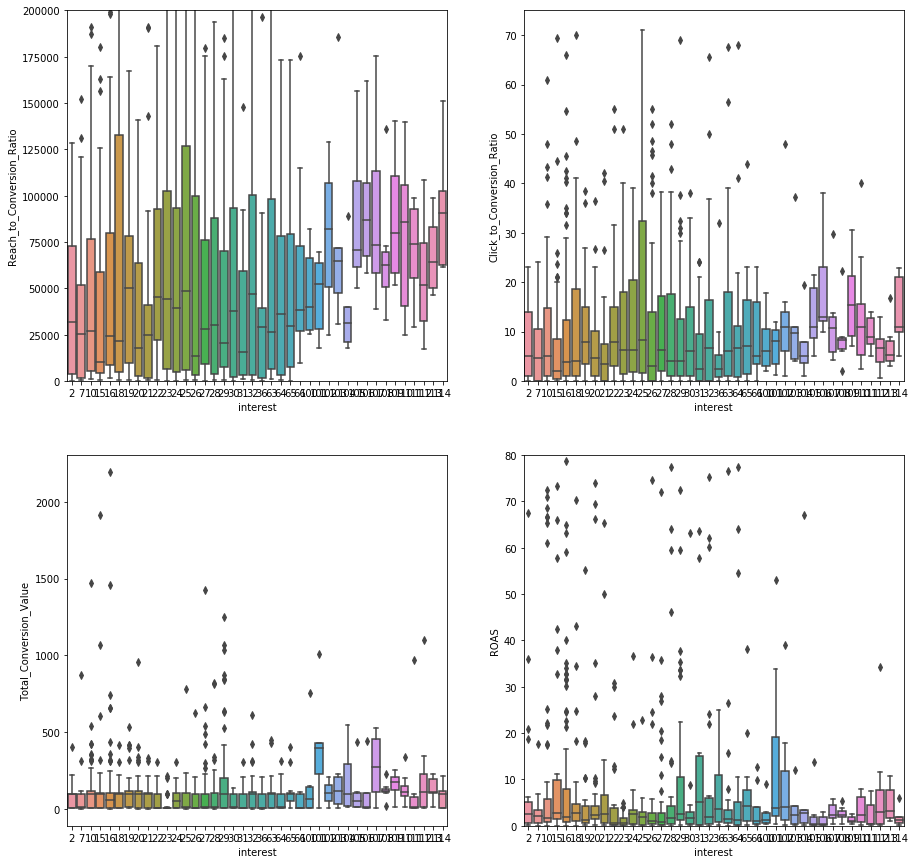

In [7]:
f, ax = plt.subplots(2,2, figsize=(15,15))

a1 = sns.boxplot(x='interest', y='Reach_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][0], )
a1.set_ylim((0,200000))

ax2 = sns.boxplot(x='interest', y='Click_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][1])
ax2.set_ylim((0,75))

ax3 = sns.boxplot(x='interest', y='Total_Conversion_Value', data=df, orient='v', ax=ax[1][0])

ax4 = sns.boxplot(x='interest', y='ROAS', data=df[df['ROAS'] != np.inf], ax=ax[1][1], orient='v')
ax4.set_ylim(0,80)

Alright, looks like there are a few interest categories that provide significantly better value. But these plots are of little help, maybe tabulating them is a better idea.

In [8]:
df[df['ROAS']!=np.inf].groupby('interest').agg(['mean','sum']).sort_values(('ROAS','mean'),ascending=False).loc[:,exp+['ROAS']].iloc[:11,:]

Impressions               Clicks             Spent               \
                   mean       sum       mean   sum        mean          sum   
interest                                                                      
63        219373.000000   8336174  44.078947  1675   65.370000  2484.060002   
31         61569.941176   1046689  11.470588   195   17.594118   299.099999   
15        274679.974359  10712519  41.256410  1609   66.596410  2597.259995   
104       282422.000000   1412110  53.000000   265   77.584000   387.919999   
101       422921.857143   2960453  74.857143   524  108.241428   757.689998   
65        115557.200000   1733358  24.800000   372   36.134000   542.010001   
19        217196.250000   6081495  42.428571  1188   69.298571  1940.359993   
32        268309.958333   6439439  47.416667  1138   82.105417  1970.530003   
10        259932.855072  17935367  48.072464  3317   73.715652  5086.379995   
29        306897.786885  18720765  54.344262  3315   82.708033  5045.190008   
28        254582.767442  10947059  47.093023  2025   74.554651  3205.850004   

         Total_Conversion      Approved_Conversion            ROAS              
                     mean  sum                mean  sum       mean         sum  
interest                                                                        
63               2.447368   93            0.789474   30  19.481254  740.287642  
31               1.411765   24            0.764706   13  18.010672  306.181425  
15               4.666667  182            1.461538   57  14.955182  583.252081  
104              8.600000   43            1.600000    8  14.794751   73.973757  
101             10.142857   71            3.571429   25  14.251890   99.763227  
65               1.933333   29            1.066667   16  13.017788  195.266822  
19               3.321429   93            1.178571   33  12.491168  349.752702  
32               2.791667   67            1.333333   32  11.566465  277.595153  
10               3.666667  253            1.202899   83  11.286410  778.762286  
29               4.737705  289            2.032787  124  10.890563  664.324364  
28               3.209302  138            0.953488   41  10.713236  460.669139

These are the 10 best performing interest categories in terms of mean Return on Advertising Spend.

Now, let's compare the three different ad campaigns.

(0, 80)

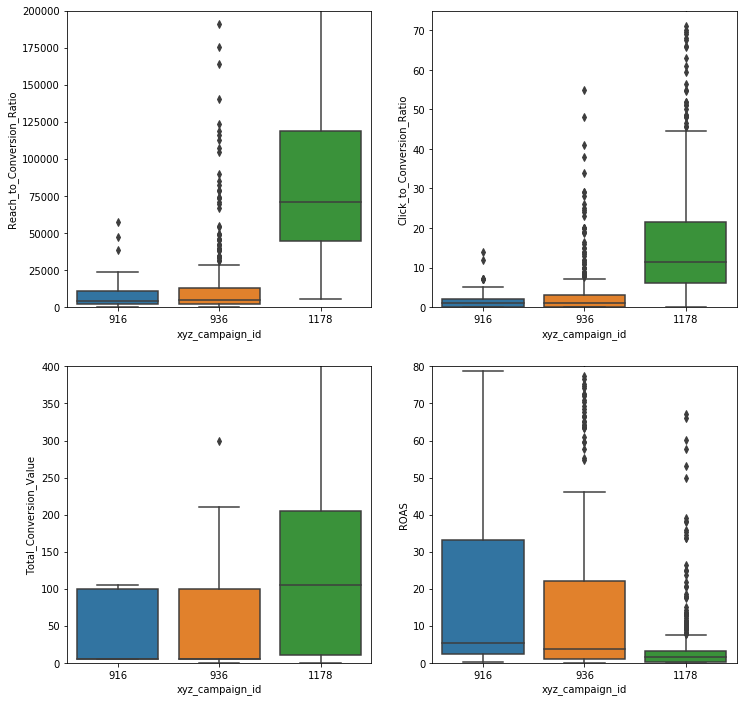

In [9]:
f, ax = plt.subplots(2,2, figsize=(12,12))

a1 = sns.boxplot(x='xyz_campaign_id', y='Reach_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][0], )
a1.set_ylim((0,200000))

ax2 = sns.boxplot(x='xyz_campaign_id', y='Click_to_Conversion_Ratio', data=df, orient='v', ax=ax[0][1])
ax2.set_ylim((0,75))

ax3 = sns.boxplot(x='xyz_campaign_id', y='Total_Conversion_Value', data=df, orient='v', ax=ax[1][0])
ax3.set_ylim((0,400))

ax4 = sns.boxplot(x='xyz_campaign_id', y='ROAS', data=df[df['ROAS'] != np.inf], ax=ax[1][1], orient='v')
ax4.set_ylim(0,80)

This is interesting. it looks like Campaign 1178 has a significantly larger sample size than campaigns 916 and 936. Let's verify this observation by means of the following table.

In [10]:
df[(df['Reach_to_Conversion_Ratio']!=np.inf) & (df['Click_to_Conversion_Ratio']!=np.inf)].groupby('xyz_campaign_id').sum().iloc[:,3:10]

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Reach_to_Conversion_Ratio,Click_to_Conversion_Ratio
xyz_campaign_id,,,,,,,
916,482925,113,149.710001,58,24,4.579005e+05,109.000000
936,8082738,1979,2887.929999,537,183,6.443897e+06,1562.266667
1178,204082957,35917,55432.719960,2669,872,5.741627e+07,10351.353690


Ah, clearly Campaign 1178 is the prominent campaign here. Perhaps Campaigns 916 and 936 are short-term campaigns(such as a New Year's Day Sale), whereas Campaign 1178 is likely a year-round campaign. This explains why Campaigns 916 and 936 have such low Reach to Conversion and Click to Conversion Ratios.

In a nutshell, Campaigns 916 and 936 are short campaigns, but they have potential for excellent ROI. Let's examine each campaign to gain some more insight.

## Analysing each campaign individually

### Campaign 1178

In [11]:
df1178 = df[(df['xyz_campaign_id'] == 1178) & (df['ROAS']!=np.inf)]


(0, 30)

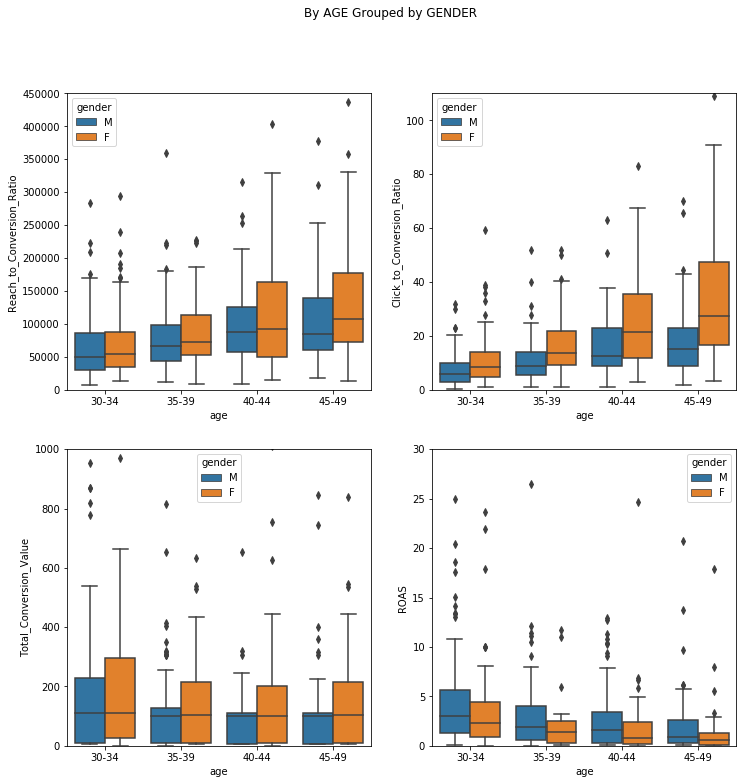

In [12]:
f, ax = plt.subplots(2,2, figsize=(12,12))

plt.suptitle('By AGE Grouped by GENDER')

a1 = sns.boxplot(x='age', y='Reach_to_Conversion_Ratio', data=df1178, orient='v', ax=ax[0][0], hue='gender')
a1.set_ylim((0,450000))

ax2 = sns.boxplot(x='age', y='Click_to_Conversion_Ratio', data=df1178, orient='v', ax=ax[0][1], hue='gender')
ax2.set_ylim((0,110))

ax3 = sns.boxplot(x='age', y='Total_Conversion_Value', data=df1178, orient='v', ax=ax[1][0], hue='gender')
ax3.set_ylim((0,1000))

ax4 = sns.boxplot(x='age', y='ROAS', data=df1178, ax=ax[1][1], orient='v', hue='gender')
ax4.set_ylim(0,30)

These plots look very similar to the ones for all three campaigns combined- which is understandable given that Campaign 1178 constitutes the bulk of our total sample size.

From the plots, we can observe the following things:
- The younger age groups are easier to convert into a buyer, and should be targeted.
- Males provide a better ROAS across all age groups, and should be targeted.

Let's check out the current strategy and expenditure.

In [13]:
df1178.groupby('age').agg(['mean','sum']).loc[:,exp+['ROAS']]

Impressions               Clicks              Spent                \
                mean       sum       mean    sum        mean           sum   
age                                                                          
30-34  343646.916667  65980208  47.604167   9140   77.008490  14785.629986   
35-39  282030.337931  40894399  46.910345   6802   73.830069  10705.359993   
40-44  299466.093750  38331660  57.898438   7411   86.894687  11122.519981   
45-49  401984.405405  59493692  85.912162  12715  128.707027  19048.639999   

      Total_Conversion       Approved_Conversion           ROAS               
                  mean   sum                mean  sum      mean          sum  
age                                                                           
30-34         6.062500  1164            2.041667  392  5.959202  1144.166795  
35-39         3.551724   515            1.151724  167  3.131810   454.112418  
40-44         3.375000   432            1.101562  141  2.857182   365.719293  
45-49         3.689189   546            1.141892  169  1.611475   238.498228

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4BA192C8>,
      dtype=object)

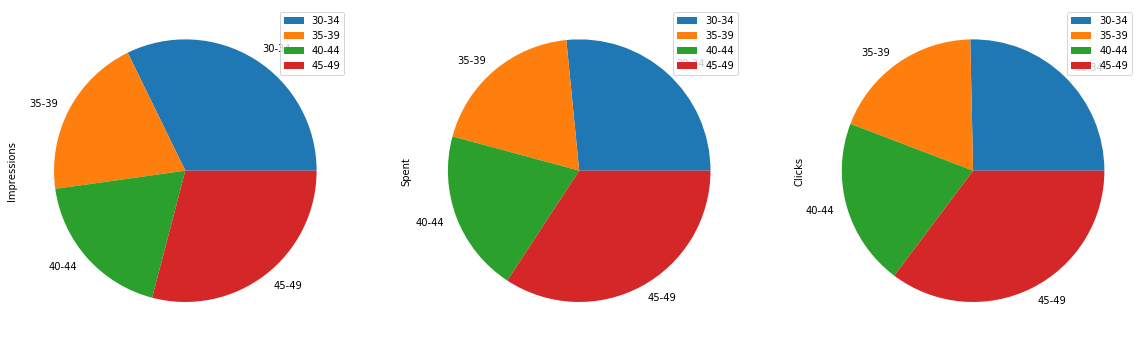

In [14]:
pie_1178 = df1178.groupby('age').agg('sum').loc[:,exp[:3]]

pie_1178.plot.pie(subplots=True, figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4BB220C8>,
      dtype=object)

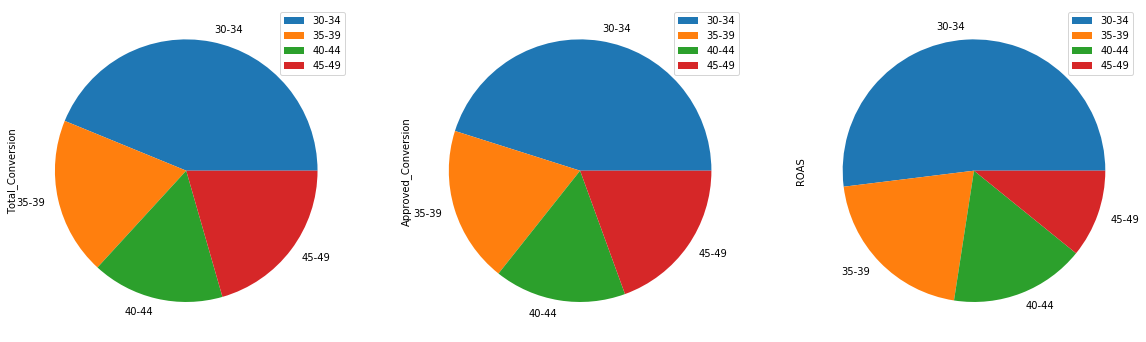

In [15]:
pie_1178 = df1178.groupby('age').agg('sum').loc[:,exp[3:]+['ROAS']]

pie_1178.plot.pie(subplots=True, figsize=(20,20))

The first 3 pie-charts represent the Investment made in various demographics.
The last 2 pie-charts represent the Return/Output for each demographic.

Currently, most of the expenditure is targeted towards the 45-49 demographic, which is not the best performing age group- as we deduced earlier. It would make sense to divert some of the spending towards the 30-34 age group- which gives the highest Total Conversion as well as the highest Approved Conversion.


In [16]:
df1178.groupby('gender').agg(['mean', 'sum']).loc[:,exp+['ROAS']]


Impressions                Clicks              Spent                \
                 mean        sum       mean    sum        mean           sum   
gender                                                                         
F       398332.797794  108346521  81.591912  22193  117.839743  32052.409965   
M       282561.401760   96353438  40.689150  13875   69.236774  23609.739994   

       Total_Conversion       Approved_Conversion           ROAS               
                   mean   sum                mean  sum      mean          sum  
gender                                                                         
F              4.845588  1318             1.43750  391  2.695326   733.128701  
M              3.926686  1339             1.40176  478  4.308997  1469.368033

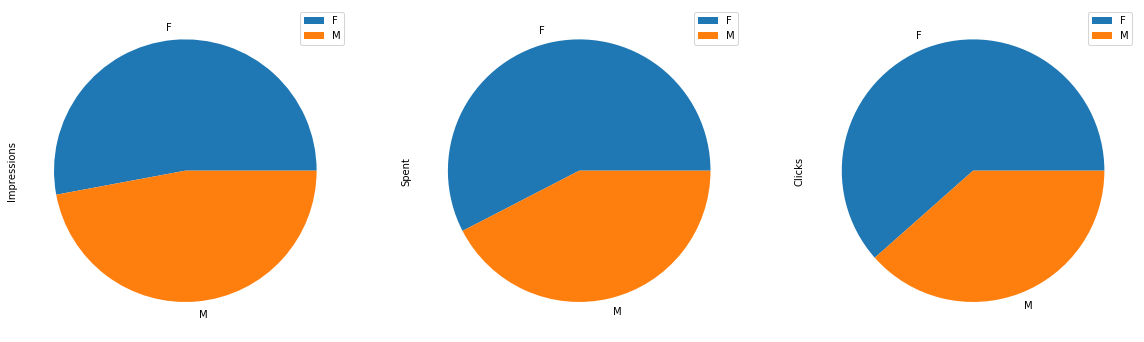

In [17]:
x = df1178.groupby('gender').agg('sum').loc[:,exp[:3]]

ax = x.plot.pie(subplots=True, figsize=(20,20))

plt.legend(loc='upper right')

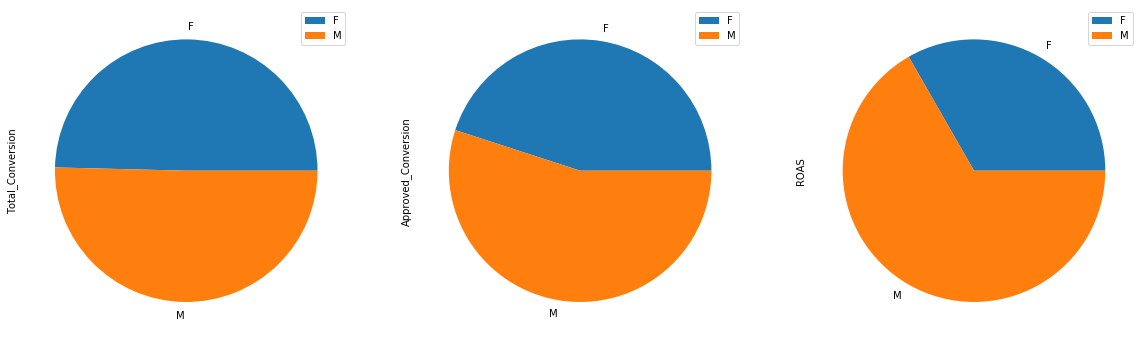

In [18]:

x = df1178.groupby('gender').agg('sum').loc[:,exp[3:]+['ROAS']]

ax = x.plot.pie(subplots=True, figsize=(20,20))

plt.legend(loc='upper right')

The first 3 pie-charts represent the Investment made in both genders.
The last 2 pie-charts represent the Return/Output in the genders.

In terms of gender, the majority of the investment goes into the female demographic. But it is fairly clear that the male demographic provides better returns despite the low investment. It is clear that investment in the male demographic needs to be increased.

Let's combine age and gender to gain better insight.

In [19]:
df.groupby(['age','gender']).agg(['mean','sum']).sort_values(by=('Total_Conversion','sum'),ascending=False).loc[:,exp]


Impressions               Clicks            Spent  \
                       mean       sum       mean   sum       mean   
age   gender                                                        
30-34 M       159045.602620  36421443  19.144105  4384  33.366463   
      F       160261.807107  31571576  25.883249  5099  38.636954   
45-49 F       278663.702899  38455591  68.413043  9441  97.342101   
35-39 M       148670.064748  20665139  21.100719  2933  36.338705   
40-44 F       218655.841121  23396175  48.383178  5177  69.126916   
35-39 F       196692.706422  21439505  38.174312  4161  55.608716   
45-49 M       208903.033058  25277267  36.454545  4411  60.474876   
40-44 M       157360.504854  16208132  24.844660  2559  40.710194   

                           Total_Conversion      Approved_Conversion       
                       sum             mean  sum                mean  sum  
age   gender                                                               
30-34 M        7640.919991         3.545852  812            1.305677  299  
      F        7611.479995         3.142132  619            0.989848  195  
45-49 F       13433.209993         2.891304  399            0.811594  112  
35-39 M        5051.080003         2.316547  322            0.805755  112  
40-44 F        7396.579984         3.009346  322            0.869159   93  
35-39 F        6061.349992         2.788991  304            0.871560   95  
45-49 M        7317.460004         2.355372  285            0.793388   96  
40-44 M        4193.149997         1.951456  201            0.747573   77

 - The 2 standout performers are (30-34 M) and (30-34 F).
 - The (35-39 M), (35-39 F), and (40-44 M) are quite under-invested, and have potential for more returns.
 - Investment in the (45-49 F) group needs to be reduced.


Finally, let's look at the best and worst performing Interest categories.

First, the best performing:

In [20]:
df1178.groupby('interest').agg(['mean','sum']).sort_values(('ROAS','mean'),ascending=False).loc[:,exp+['ROAS']].iloc[:11,:]

Impressions               Clicks             Spent               \
                   mean       sum       mean   sum        mean          sum   
interest                                                                      
104       282422.000000   1412110  53.000000   265   77.584000   387.919999   
101       422921.857143   2960453  74.857143   524  108.241428   757.689998   
102       165850.428571   1160953  21.428571   150   30.724286   215.069999   
31         73685.642857   1031599  13.500000   189   20.737857   290.329999   
112       332081.714286   2324572  48.428571   339   69.114286   483.799999   
15        522913.300000  10458266  77.700000  1554  125.715000  2514.299996   
36         70278.307692    913618   9.692308   126   15.618462   203.040000   
65        148549.818182   1634048  31.181818   343   45.214546   497.360001   
21        131909.523810   2770100  23.476190   493   37.839048   794.619999   
2         106325.500000   1701208  19.125000   306   31.167500   498.680005   
113       305094.166667   1830565  38.833333   233   57.138333   342.830000   

         Total_Conversion      Approved_Conversion           ROAS              
                     mean  sum                mean sum       mean         sum  
interest                                                                       
104              8.600000   43            1.600000   8  14.794751   73.973757  
101             10.142857   71            3.571429  25  14.251890   99.763227  
102              2.000000   14            1.000000   7   9.883247   69.182732  
31               1.500000   21            0.714286  10   7.888230  110.435221  
112              7.571429   53            2.142857  15   7.717580   54.023057  
15               7.900000  158            2.500000  50   7.534988  150.699759  
36               1.615385   21            0.615385   8   7.051553   91.670195  
65               2.272727   25            1.272727  14   6.667325   73.340572  
21               2.666667   56            1.000000  21   6.065081  127.366703  
2                1.937500   31            0.875000  14   5.166213   82.659409  
113              4.166667   25            1.166667   7   4.790770   28.744621

Interest categories 104, 101, 102, 31, and 112 perform very well and are worth investing in.

Now, the worst performing categories:

In [21]:
df1178.groupby('interest').agg(['mean','sum']).sort_values(('ROAS','mean'),ascending=True).loc[:,exp+['ROAS']].iloc[:11,:]

Impressions                Clicks             Spent               \
                   mean       sum        mean   sum        mean          sum   
interest                                                                       
23        113601.375000   1817622   23.250000   372   37.067500   593.080001   
106       318486.200000   1592431   66.400000   332   96.430001   482.150004   
109       496727.500000   2980365   95.333333   572  135.970000   815.820001   
26        256433.823529   4359375   56.294118   957   80.781176  1373.279997   
28        415009.730769  10790253   76.038462  1977  120.656539  3137.070004   
25        274994.421053   5224894   55.631579  1057   83.864737  1593.429994   
27        600583.153846  15615162  123.846154  3220  187.056153  4863.459991   
30        135492.437500   2167879   23.750000   380   37.816875   605.070002   
10        501539.029412  17052327   90.500000  3077  139.557059  4744.939993   
114       213232.800000   1066164   38.200000   191   56.524000   282.619998   
64        204294.041667   4903057   39.166667   940   58.990833  1415.779996   

         Total_Conversion      Approved_Conversion          ROAS             
                     mean  sum                mean sum      mean        sum  
interest                                                                     
23               1.375000   22            0.312500   5  1.055493  16.887886  
106              4.000000   20            1.000000   5  1.086570   5.432852  
109              6.333333   38            1.333333   8  1.348622   8.091733  
26               2.647059   45            0.882353  15  1.398192  23.769268  
28               4.538462  118            1.230769  32  1.554849  40.426087  
25               3.684211   70            0.894737  17  1.568900  29.809109  
27               7.730769  201            1.653846  43  1.711839  44.507818  
30               2.125000   34            0.562500   9  1.747819  27.965096  
10               6.352941  216            1.970588  67  1.786978  60.757239  
114              2.400000   12            0.800000   4  1.987083   9.935417  
64               2.500000   60            0.750000  18  2.145181  51.484340

Categories 28, 27, 25, and 10 are possibly shown too much trust with the investments. Their return numbers do not justify the current investment. Their investment should be reduced and redistributed for better returns.

*NOTE* <br>
Before we proceed further, it is worth mentioning that the sample sizes for both Campaigns 916 and 936 are relatively small, and hence, I have not used ROAS as a metric for statistical comparisons between column performances, as that would require me to delete some data points(which would be extremely detrimental). It is possible to encounter outliers, and they will have to be examined more closely.

## Campaign 916

In [22]:
df916 = df[df['xyz_campaign_id'] == 916]

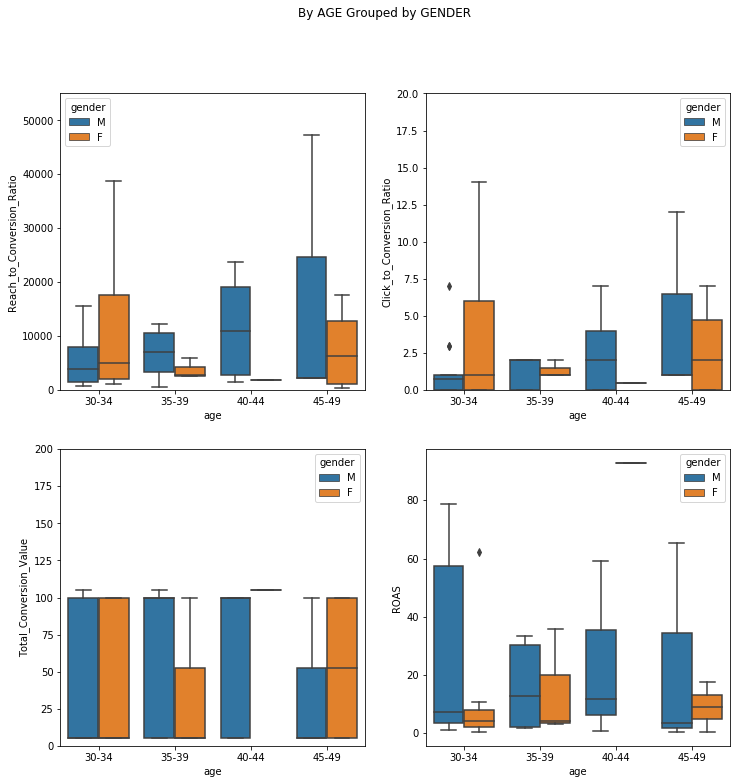

In [23]:
f, ax = plt.subplots(2,2, figsize=(12,12))

plt.suptitle('By AGE Grouped by GENDER')

a1 = sns.boxplot(x='age', y='Reach_to_Conversion_Ratio', data=df916, orient='v', ax=ax[0][0], hue='gender')
a1.set_ylim((0,55000))

ax2 = sns.boxplot(x='age', y='Click_to_Conversion_Ratio', data=df916, orient='v', ax=ax[0][1], hue='gender')
ax2.set_ylim((0,20))

ax3 = sns.boxplot(x='age', y='Total_Conversion_Value', data=df916[df916['Total_Conversion_Value']!=np.inf], orient='v', ax=ax[1][0], hue='gender')
ax3.set_ylim((0,200))

ax4 = sns.boxplot(x='age', y='ROAS', data=df916[df916['ROAS']!=np.inf], ax=ax[1][1], orient='v', hue='gender')

From these plots it is evident that Campaign 916 mainly appeals to the male demographic. On first glance, the age groups provide more or less the same ROAS. Let us analyse the Investments vs Returns for the age groups first.

In [24]:
df916.groupby('age').agg(['mean','sum']).loc[:,exp]

Impressions            Clicks         Spent        Total_Conversion  \
               mean     sum      mean sum      mean    sum             mean   
age                                                                           
30-34   8885.241379  257672  1.965517  57  2.597586  75.33         1.068966   
35-39   6756.333333   81076  1.416667  17  1.970000  23.64         1.083333   
40-44  10329.500000   61977  2.333333  14  2.801667  16.81         1.166667   
45-49  11742.857143   82200  3.571429  25  4.847143  33.93         1.000000   

          Approved_Conversion      
      sum                mean sum  
age                                
30-34  31            0.379310  11  
35-39  13            0.500000   6  
40-44   7            0.666667   4  
45-49   7            0.428571   3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF49BC9948>,
      dtype=object)

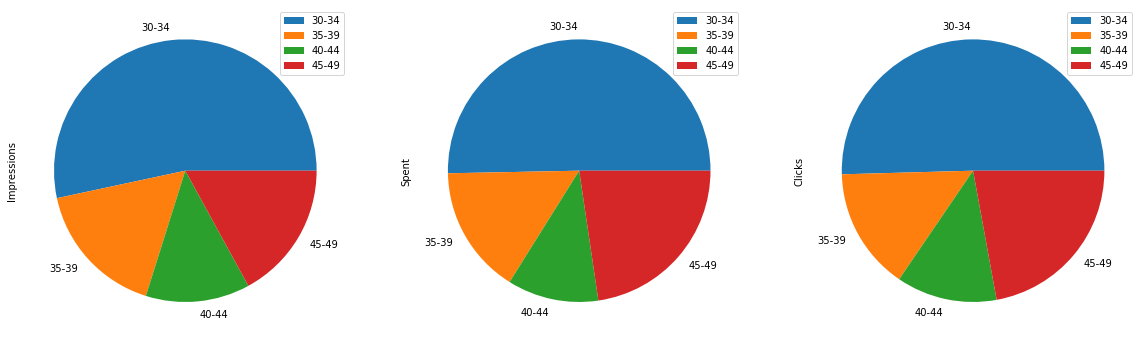

In [25]:
pie_916 = df916.groupby('age').agg('sum').loc[:,exp[:3]]

pie_916.plot.pie(subplots=True, figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF49C28F08>,
      dtype=object)

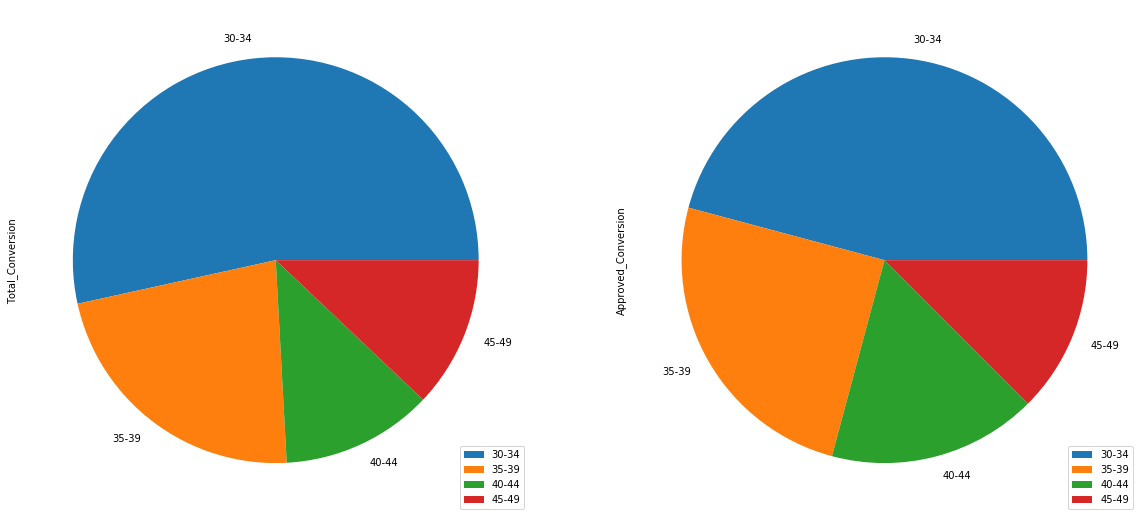

In [26]:
pie_916 = df916.groupby('age').agg('sum').loc[:,exp[3:]]

pie_916.plot.pie(subplots=True, figsize=(20,20))

This is interesting. The age group 30-34 is clearly the best in terms of providing returns. But we have a nice opportunity to improve the Returns by investing more in the 35-39 and 40-44 demographic- which clearly provide better returns despite less investment. 

Now let's see if bringing gender into the equation can give us better insight.

In [27]:
df916.groupby(['age','gender']).agg(['mean','sum']).sort_values(by=('Total_Conversion','sum'),ascending=False).loc[:,exp]


Impressions            Clicks         Spent         \
                      mean     sum      mean sum      mean    sum   
age   gender                                                        
30-34 M        5892.722222  106069  1.166667  21  1.518889  27.34   
      F       13782.090909  151603  3.272727  36  4.362727  47.99   
35-39 M        7769.000000   69921  1.444444  13  2.002222  18.02   
40-44 M       11633.000000   58165  2.600000  13  3.136000  15.68   
45-49 F        7627.750000   30511  2.750000  11  3.777500  15.11   
35-39 F        3718.333333   11155  1.333333   4  1.873333   5.62   
45-49 M       17229.666667   51689  4.666667  14  6.273333  18.82   
40-44 F        3812.000000    3812  1.000000   1  1.130000   1.13   

             Total_Conversion     Approved_Conversion      
                         mean sum                mean sum  
age   gender                                               
30-34 M              1.111111  20            0.388889   7  
      F              1.000000  11            0.363636   4  
35-39 M              1.111111  10            0.555556   5  
40-44 M              1.000000   5            0.600000   3  
45-49 F              1.000000   4            0.500000   2  
35-39 F              1.000000   3            0.333333   1  
45-49 M              1.000000   3            0.333333   1  
40-44 F              2.000000   2            1.000000   1

From the above table, it becomes clear that the 3 best performing demographics are (30-34 M), (30-34 F), and (35-39 M). The rest are not satisfying enough. It is advisable, therefore, to invest more in these specific demographics.
The groups- (40-44 F), (45-49 M), (35-39 F)- give very disappointing results, so, investment in these demographics should be heavily scrutinized.

Grouping the values by Interest categories:

In [28]:
df916.groupby('interest').agg(['mean','sum']).sort_values(('Total_Conversion','sum'),ascending=False).loc[:,exp].iloc[:11,:]

Impressions            Clicks         Spent         \
                  mean     sum      mean sum      mean    sum   
interest                                                        
16        18176.625000  290826  3.562500  57  4.538750  72.62   
15         5748.777778   51739  1.111111  10  1.592222  14.33   
28         4783.750000   19135  1.250000   5  1.425000   5.70   
29        10525.333333   31576  3.000000   9  4.136667  12.41   
20         6048.333333   18145  2.666667   8  3.960000  11.88   
27         3135.000000    9405  1.000000   3  1.433333   4.30   
7           647.000000    1294  0.000000   0  0.000000   0.00   
63         9378.500000   18757  3.500000   7  4.690000   9.38   
31         1124.000000    2248  0.000000   0  0.000000   0.00   
10         6323.500000   12647  2.000000   4  2.865000   5.73   
32         3091.000000    3091  1.000000   1  1.610000   1.61   

         Total_Conversion     Approved_Conversion      
                     mean sum                mean sum  
interest                                               
16               1.125000  18            0.500000   8  
15               1.222222  11            0.444444   4  
28               1.000000   4            0.500000   2  
29               1.000000   3            1.000000   3  
20               1.000000   3            0.333333   1  
27               1.000000   3            0.333333   1  
7                1.000000   2            0.000000   0  
63               1.000000   2            0.000000   0  
31               1.000000   2            0.500000   1  
10               1.000000   2            1.000000   2  
32               1.000000   1            1.000000   1

Two categories stand out here- 15, and 16. They outperform the others by a mile and should be heavily invested in. Particularly Interest 16.

## Campaign 936

In [29]:
df936 = df[df['xyz_campaign_id']==936]

(0, 200)

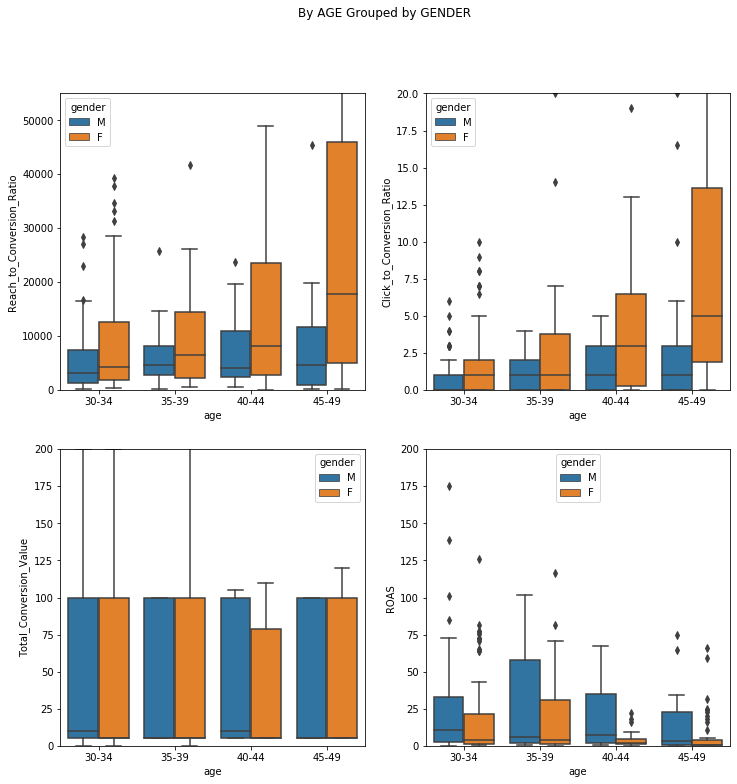

In [30]:
f, ax = plt.subplots(2,2, figsize=(12,12))

plt.suptitle('By AGE Grouped by GENDER')

a1 = sns.boxplot(x='age', y='Reach_to_Conversion_Ratio', data=df936, orient='v', ax=ax[0][0], hue='gender')
a1.set_ylim((0,55000))

ax2 = sns.boxplot(x='age', y='Click_to_Conversion_Ratio', data=df936, orient='v', ax=ax[0][1], hue='gender')
ax2.set_ylim((0,20))

ax3 = sns.boxplot(x='age', y='Total_Conversion_Value', data=df936, orient='v', ax=ax[1][0], hue='gender')
ax3.set_ylim((0,200))

ax4 = sns.boxplot(x='age', y='ROAS', data=df936[df936['ROAS']!=np.inf], ax=ax[1][1], orient='v', hue='gender')
ax4.set_ylim(0,200)

On first glance, this campaign looks very similar to Campaign 916.
Let's begin the analysis.

In [31]:
df936.groupby('age').agg(['mean','sum']).loc[:,exp]

Impressions              Clicks            Spent               \
               mean      sum       mean   sum       mean          sum   
age                                                                     
30-34   8448.719388  1655949   1.459184   286   1.997143   391.440000   
35-39  12490.730337  1111675   3.089888   275   4.308202   383.430001   
40-44  16047.960000  1203597   4.146667   311   6.005333   450.400000   
45-49  39970.826923  4156966  10.692308  1112  16.039423  1668.099997   

      Total_Conversion      Approved_Conversion      
                  mean  sum                mean sum  
age                                                  
30-34         1.158163  227            0.448980  88  
35-39         1.078652   96            0.382022  34  
40-44         1.106667   83            0.333333  25  
45-49         1.259615  131            0.346154  36

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4B08A148>,
      dtype=object)

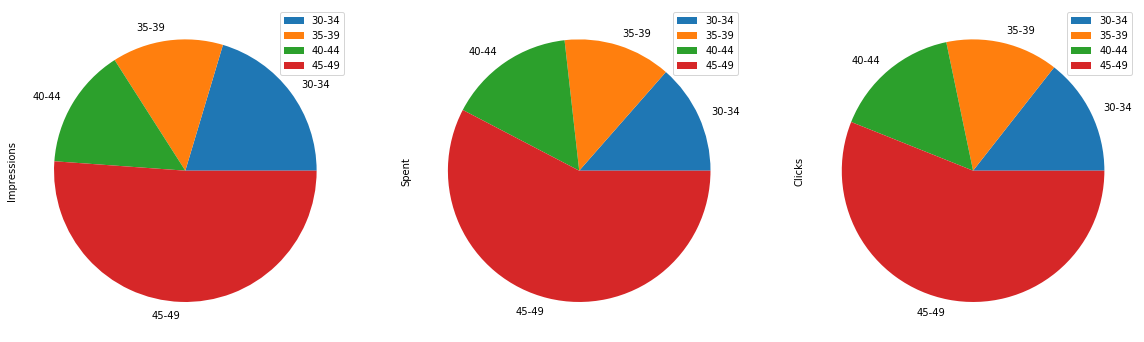

In [32]:
pie_936 = df936.groupby('age').agg('sum').loc[:,exp[:3]]

pie_936.plot.pie(subplots=True, figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF4B9B08C8>,
      dtype=object)

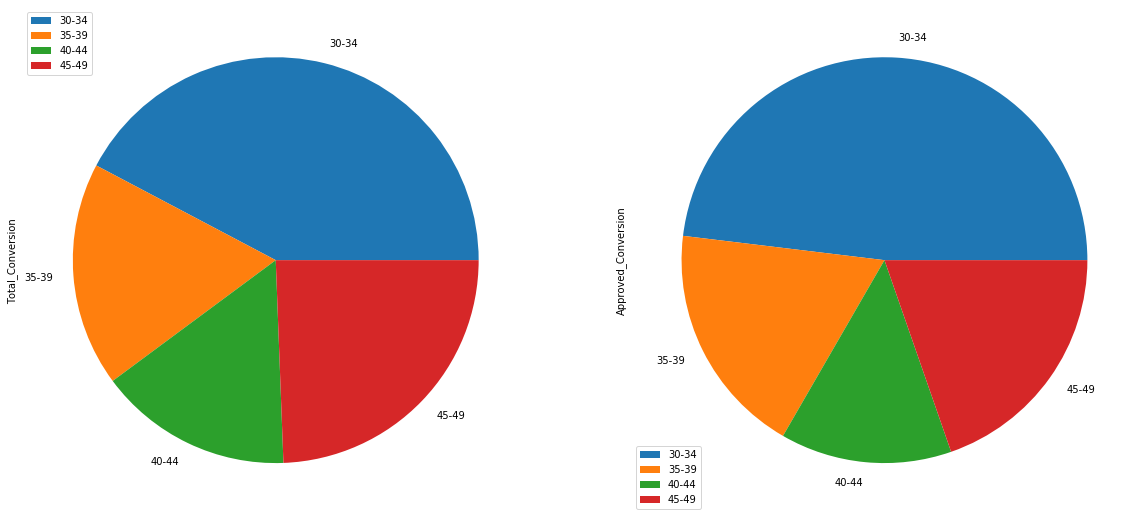

In [33]:
pie_936 = df936.groupby('age').agg('sum').loc[:,exp[3:]]

pie_936.plot.pie(subplots=True, figsize=(20,20))

The first 3 pie-charts represent the spread of investment across the 4 age groups.
The next 2 pie-charts represent the spread of returns/output across the 4 age groups

First of all, it is abundantly clear that the current investment in the 45-49 age group is unreasonably large and doesn't provide the returns to justify that.
Secondly, the 30-34 age group performs exceptionally well in terms if ROI, and should be the priority for the next strategy.

Now let us bring gender into the equation to investigate further.

In [34]:
df936.groupby(['age','gender']).agg('sum').sort_values(by=('Total_Conversion'),ascending=False).loc[:,exp+['Cost_per_Click']]

Impressions        Spent  Clicks  Total_Conversion  \
age   gender                                                       
30-34 M            658525   137.510000     100               117   
      F            997424   253.930000     186               110   
45-49 F           3455093  1432.929997     962                87   
35-39 F            868282   317.790001     228                54   
40-44 F            969407   375.710000     257                51   
45-49 M            701873   235.170000     150                44   
35-39 M            243393    65.640000      47                42   
40-44 M            234190    74.689999      54                32   

              Approved_Conversion  Cost_per_Click  
age   gender                                       
30-34 M                        49       52.549833  
      F                        39       75.901134  
45-49 F                        23       78.961885  
35-39 F                        22       43.926209  
40-44 F                        12       47.115809  
45-49 M                        13       32.736084  
35-39 M                        12       32.741667  
40-44 M                        13       28.955667

We see that the ad performed better for younger age groups((45-49 F) is an anomaly because of the absurdly high investment made, as illustrated by the high Cost per Click value). In particular, (30-34 M) is the best performing sub-group here, both in terms of absolute returns, as well as ROI. It should be targeted more.

Now, grouping the ads be interest:

In [35]:
df936.groupby('interest').agg(['mean','sum']).sort_values(('Total_Conversion','sum'),ascending=False).loc[:,exp].iloc[:11,:]

Impressions             Clicks           Spent               \
                  mean      sum      mean  sum       mean          sum   
interest                                                                 
16        43276.883721  3721812  9.255814  796  13.788140  1185.779999   
10        18760.583333   900508  4.916667  236   6.993958   335.710002   
29        18787.102564   732697  5.051282  197   6.802564   265.299999   
27        23482.580645   727960  6.000000  186   9.948710   308.410002   
26        21812.652174   501691  6.782609  156   9.499565   218.489998   
15        10720.500000   235851  2.045455   45   3.119545    68.629999   
18         7358.681818   161891  1.636364   36   2.274091    50.030000   
64         7600.125000   182403  2.041667   49   2.931250    70.350000   
28         7163.904762   150442  2.047619   43   3.003809    63.079999   
20         4161.727273    91558  1.363636   30   1.757273    38.660000   
63        11467.333333   206412  2.944444   53   4.351111    78.320001   

         Total_Conversion      Approved_Conversion      
                     mean  sum                mean sum  
interest                                                
16               1.383721  119            0.372093  32  
10               1.041667   50            0.437500  21  
29               1.256410   49            0.487179  19  
27               1.161290   36            0.322581  10  
26               1.260870   29            0.347826   8  
15               1.181818   26            0.409091   9  
18               1.136364   25            0.318182   7  
64               1.000000   24            0.375000   9  
28               1.142857   24            0.380952   8  
20               1.045455   23            0.318182   7  
63               1.111111   20            0.333333   6

 - Once again, just like Campaign 916, Interest 16 is the standout.
 - Interests 29, 26, and 15 are potentially explosive too.

Let's see if the best ROAS of each campaign are much different

In [36]:
imp = exp+['ROAS']

df[df['ROAS']!=np.inf].groupby('xyz_campaign_id').agg('mean').loc[:,imp]

,Impressions,Spent,Clicks,Total_Conversion,Approved_Conversion,ROAS
xyz_campaign_id,,,,,,
916,12801.314286,4.277429,3.228571,1.114286,0.457143,21.168579
936,26802.869416,9.942852,6.817869,1.223368,0.405498,19.798610
1178,333931.417618,90.802855,58.838499,4.334421,1.417618,3.592980


Great, we can see the clear jump in Return on Advertising Spend for the short-term campaigns 916 and 936.

### Conclusion

Alright! After all the analysis, we have some interesting findings on out hands. In some cases, the initial analysis was challenged by statistics attained by deeper investigation, leading to better insight.
Let's summarize our findings:

#### Campaign 1178
 - It was discovered that expenditure in the 45-49 age group was disprorortionately large when compared to the returns provided by the same group. Hence, some of the investment should be pulled from there and redistributed.
 - The 30-34 age group(M and F), as well as (35-39 M), (35-39 F), and (40-44 M); are all good performers. And should be invested in more. Once strategy could be to redistribute the funds pulled from the 45-49 age group.
 - Finally, it was found that Interest categories 104, 101, 102, 31, and 112 provide good returns and should be invested in. On the contrary, categories 28, 27, 25, and 10 are not up to the mark and should be avoided.
 
#### Campaign 916
 - The sub-groups (30-34 M), (30-34 F), and (35-39 M) provide the best opprtunities, whereas (40-44 F), (45-49 M), (35-39 F) should be reconsidered.
 - Interest categories 15 and 16 are highly valuable and should be exploited for profit.

#### Campaign 936
 - Investment in the age group 45-49 is absurdly high and needs to be redistributed. Once again, 30-34 is the best performing group, with (30-34 M) being especially beneficial.
 - Interest 16 is the most popular, just like Campaign 916. Interests 29, 26, and 15 are also decent performers.
 
Finally, we saw that the Return on Advertising Spend jumped to more than 6 times for the short-term campaigns 916 and 936. This is a great opportunity to pull some investment from the regular campaign(1178), and pump more into the short-term campaigns, maximizing the profit.

This concludes my analysis.